In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !unzip drive/My\ Drive/images

In [0]:
import os 
import shutil

In [0]:
folders = os.listdir('images/')

In [48]:
print(folders)

['humans', 'horses', 'cats', 'dogs']


In [0]:
label_dict = {
    'humans':0,
    'horses':1,
    'cats':2,
    'dogs':3
}

In [0]:
import keras
import cv2
import numpy as np
from keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [0]:
images = []
labels = []

for folder in folders:
  dirc = os.path.join('images', folder)
  for each in os.listdir(dirc):
    path = os.path.join(dirc, each)
    img = cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(label_dict[folder])
    

In [73]:
print(len(images), len(labels))

808 808


In [0]:
# now we need to shuffle them 

images, labels = shuffle(images, labels)

0


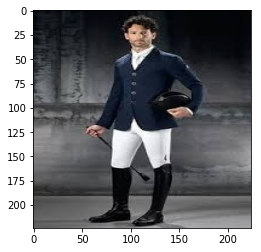

In [81]:
print(labels[3])
plt.imshow(images[3])

In [0]:
x = np.array(images)
y = np.array(labels)

In [85]:
print(x.shape, y.shape)

(808, 224, 224, 3) (808,)


In [0]:
y = keras.utils.np_utils.to_categorical(y, num_classes=4)

In [87]:
y.shape

(808, 4)

#### Model architecture

In [0]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import *
from keras.layers import *
from keras.optimizers import *


In [100]:
model = MobileNetV2(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

9412608/9406464 [==============================] - 1s 0us/step


In [101]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [103]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256, activation='relu')(av1)
d1 = Dropout(0.25)(fc1)
fc2 = Dense(4, activation='softmax')(d1)

W0808 09:40:41.583123 139728989190016 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
new_model = Model(model.input, outputs  = fc2)

In [105]:
new_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
adam = Adam(lr=0.00003)

In [107]:
new_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

W0808 09:44:01.209159 139728989190016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [108]:
hist = new_model.fit(x, y, batch_size=64, epochs=20, shuffle=True, validation_split=0.2)

W0808 09:46:07.428761 139728989190016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 21s 33ms/step - loss: 1.2689 - acc: 0.4396 - val_loss: 0.7596 - val_acc: 0.8642
Epoch 2/20
646/646 [==============================] - 8s 13ms/step - loss: 0.6080 - acc: 0.8607 - val_loss: 0.4534 - val_acc: 0.9259
Epoch 3/20
646/646 [==============================] - 8s 13ms/step - loss: 0.3378 - acc: 0.9412 - val_loss: 0.2981 - val_acc: 0.9444
Epoch 4/20
646/646 [==============================] - 8s 13ms/step - loss: 0.2174 - acc: 0.9644 - val_loss: 0.2208 - val_acc: 0.9506
Epoch 5/20
646/646 [==============================] - 8s 13ms/step - loss: 0.1367 - acc: 0.9876 - val_loss: 0.1757 - val_acc: 0.9630
Epoch 6/20
646/646 [==============================] - 8s 13ms/step - loss: 0.1054 - acc: 0.9923 - val_loss: 0.1465 - val_acc: 0.9568
Epoch 7/20
646/646 [==============================] - 8s 13ms/step - loss: 0.0864 - acc: 0.9907 - val_loss: 0.1291 - val_acc: 0.9630
Epoch 8/20
646/646 [==

In [0]:
def plot_loss_accuracy():
  # plot loss
  print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
  print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['loss'], label='training_loss')

  # plot accuracy
  plt.plot(hist.history['val_acc'], label='val_acc')
  plt.plot(hist.history['acc'], label='training_acc')
  plt.legend()
  plt.show()

training_loss = 0.010949425906773322    val_loss = 0.051336531791790034
training_acc = 100.0    val_acc = 98.76543151007759


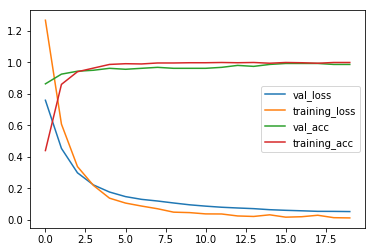

In [110]:
plot_loss_accuracy()